<a href="https://colab.research.google.com/github/Reyhaneh2001/AirlinePassengersForecasting/blob/main/TimeSeriesForecastingOfAirlinePassengers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Airline Passenger Forecasting with Deep Learning

## Overview
This project uses deep learning techniques to forecast airline passenger traffic based on historical data. The goal is to predict the number of passengers in the upcoming months using different Recurrent Neural Network (RNN) architectures.

## Dataset
The dataset used is the **Airline Passengers dataset** which consists of monthly total international airline passengers from 1949 to 1960.

### Models Used
- Simple RNN
- LSTM (Long Short-Term Memory)
- GRU (Gated Recurrent Unit)
- Conv1D
- Bidirectional LSTM

Each model was trained on the same dataset.

## Results
Here we compare the actual and predicted values for each model.

## Conclusion
The Bidirectional LSTM model performed the best in forecasting passenger traffic due to its ability to capture long-term dependencies.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Conv1D, Dense, Bidirectional
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

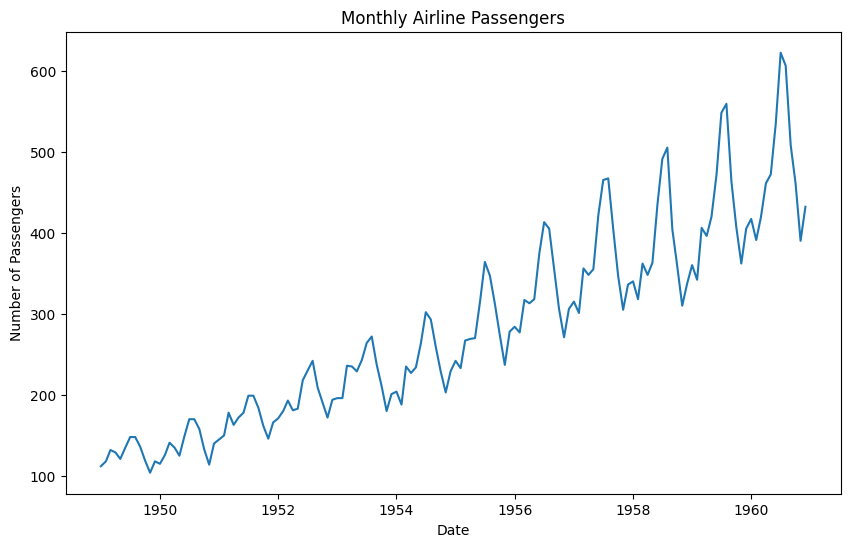

In [ ]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
data = pd.read_csv(url, header=0, parse_dates=[0], index_col=0)

# Plot the dataset
plt.figure(figsize=(10, 6))
plt.plot(data)
plt.title('Monthly Airline Passengers')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.show()

# **Preprocessing and prepare dataset for timeseries forecasting**

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data.values.reshape(-1, 1))


def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 12  # Number of previous months to predict the next month
X, y = create_dataset(data_scaled, time_step)

# Reshape input to be [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Display shapes for confirmation
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")


Training data shape: (105, 12, 1)
Test data shape: (27, 12, 1)


# **Build models and compare them**

In [ ]:
# Define models with more layers
def create_model(model_type='SimpleRNN', time_step=12):
    model = Sequential()

    if model_type == 'SimpleRNN':
        model.add(SimpleRNN(50, return_sequences=True, input_shape=(time_step, 1)))
        model.add(SimpleRNN(50, return_sequences=True))
        model.add(SimpleRNN(50, return_sequences=True))
        model.add(SimpleRNN(50, return_sequences=True))
        model.add(SimpleRNN(50, return_sequences=False))
    elif model_type == 'LSTM':
        model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
        model.add(LSTM(50, return_sequences=True))
        model.add(LSTM(50, return_sequences=True))
        model.add(LSTM(50, return_sequences=True))
        model.add(LSTM(50, return_sequences=False))
    elif model_type == 'GRU':
        model.add(GRU(50, return_sequences=True, input_shape=(time_step, 1)))
        model.add(GRU(50, return_sequences=True))
        model.add(GRU(50, return_sequences=True))
        model.add(GRU(50, return_sequences=True))
        model.add(GRU(50, return_sequences=False))
    elif model_type == 'Conv1D':
        model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(time_step, 1)))
        model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
        model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
        model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
        model.add(Dense(50))
    elif model_type == 'Bidirectional LSTM':
        model.add(Bidirectional(LSTM(50, return_sequences=True), input_shape=(time_step, 1)))
        model.add(Bidirectional(LSTM(50, return_sequences=True)))
        model.add(Bidirectional(LSTM(50, return_sequences=True)))
        model.add(Bidirectional(LSTM(50, return_sequences=True)))
        model.add(Bidirectional(LSTM(50, return_sequences=False)))

    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])
    return model


Training SimpleRNN...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Training LSTM...

Training GRU...

Training Conv1D...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training Bidirectional LSTM...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


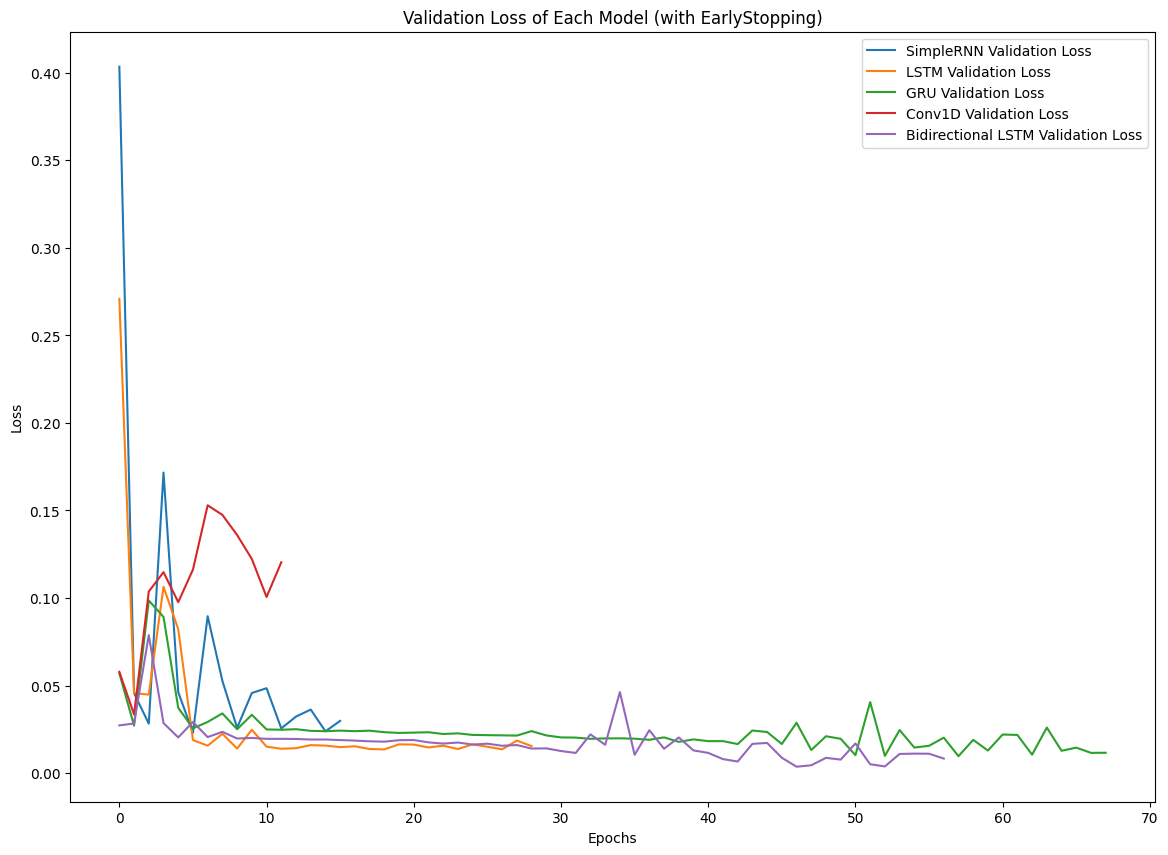

In [ ]:
# Train models with EarlyStopping
models = ['SimpleRNN', 'LSTM', 'GRU', 'Conv1D', 'Bidirectional LSTM']

history_dict = {}
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

for model_name in models:
    print(f"\nTraining {model_name}...")
    model = create_model(model_name)
    history = model.fit(X_train, y_train, epochs=75, batch_size=32, validation_data=(X_test, y_test),
                        verbose=0, callbacks=[early_stopping])
    history_dict[model_name] = history

# Plot training and validation loss for each model
plt.figure(figsize=(14, 10))
for model_name, history in history_dict.items():
    plt.plot(history.history['val_loss'], label=f'{model_name} Validation Loss')
plt.title('Validation Loss of Each Model (with EarlyStopping)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# **Evaluate models and make predictions**

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step


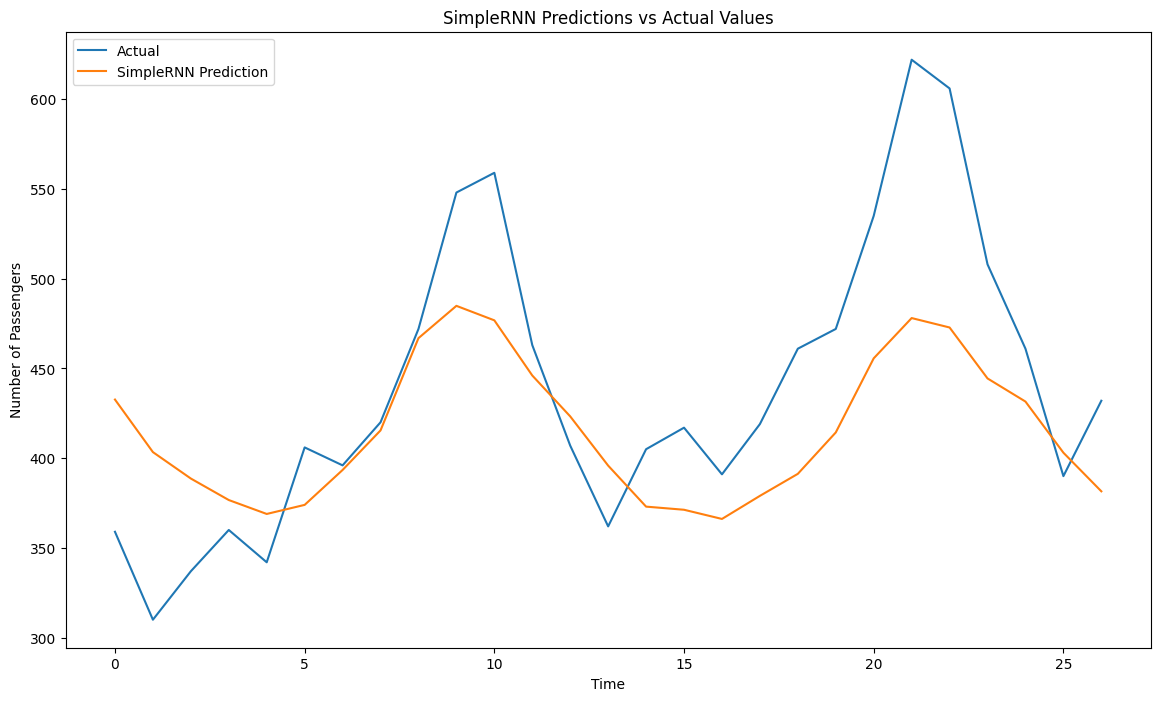

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 699ms/step


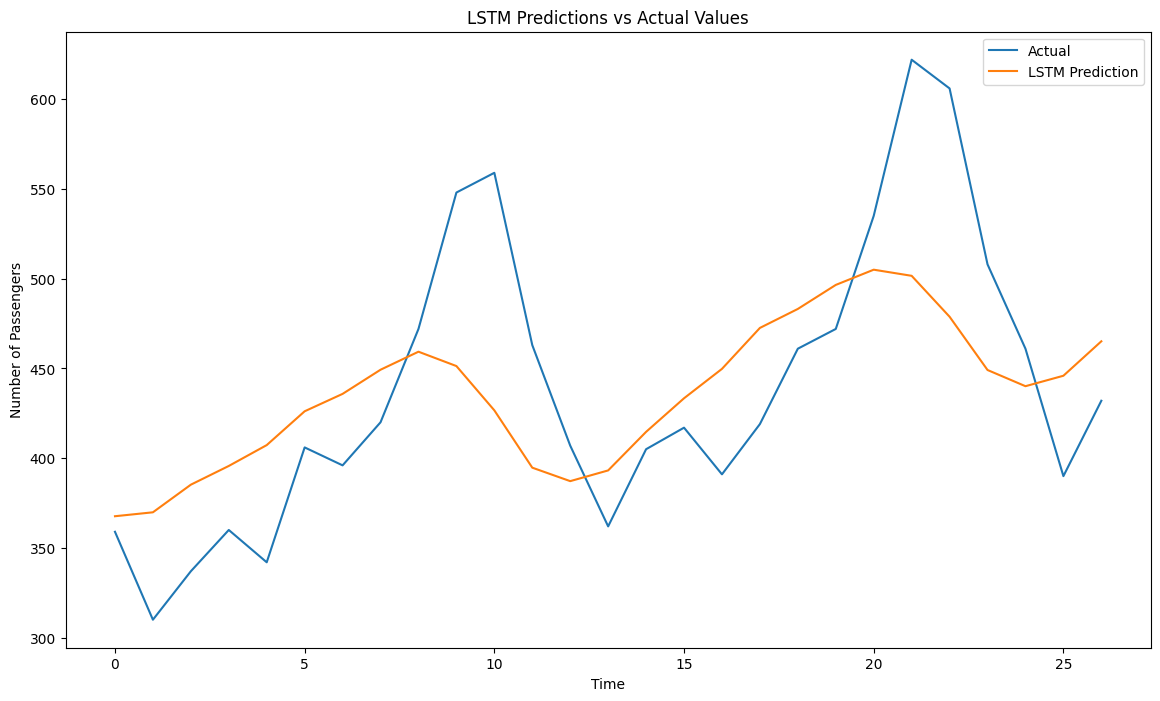

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


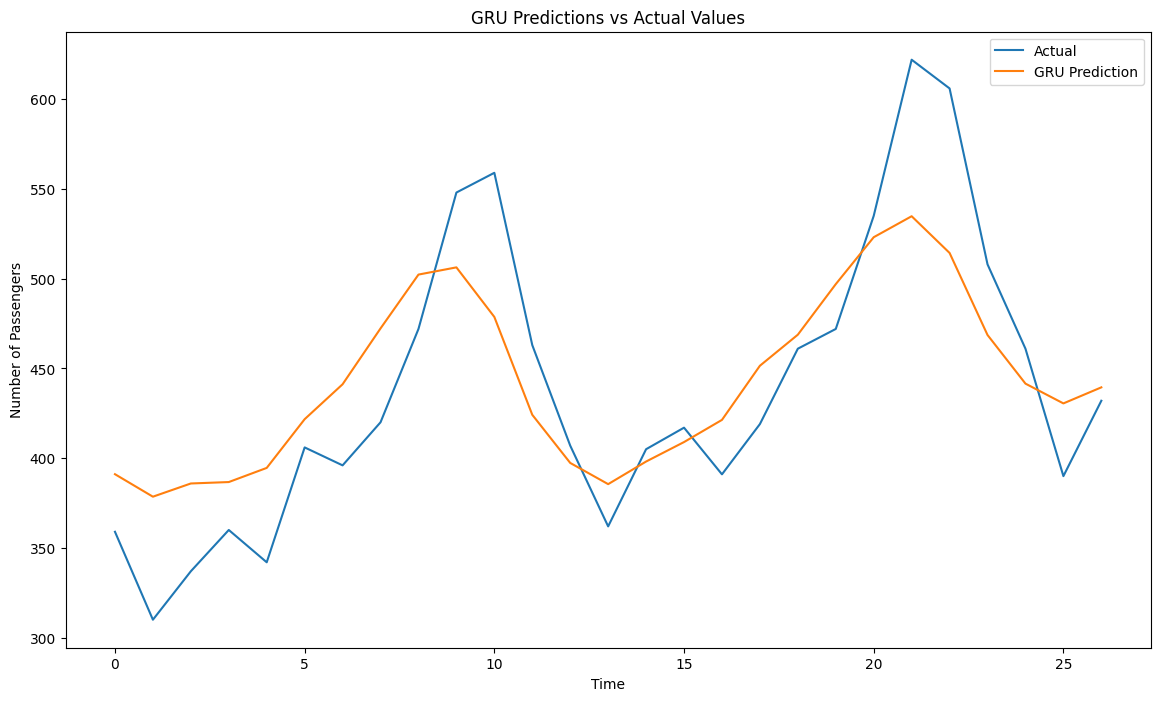

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


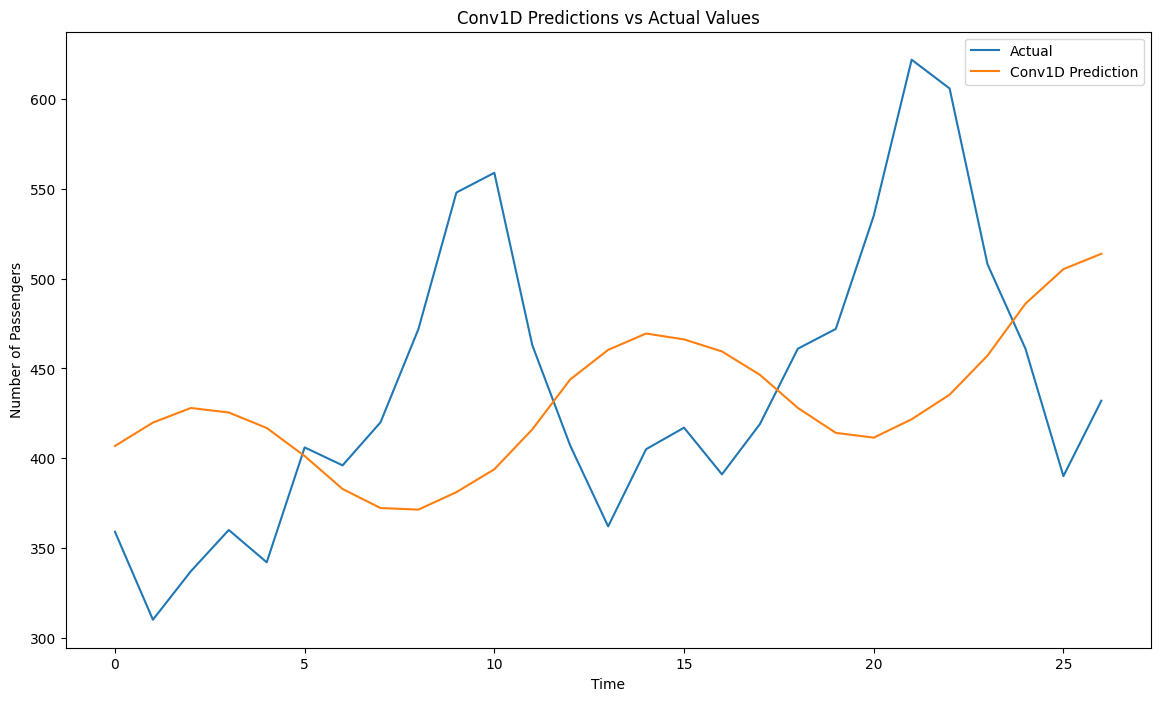

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


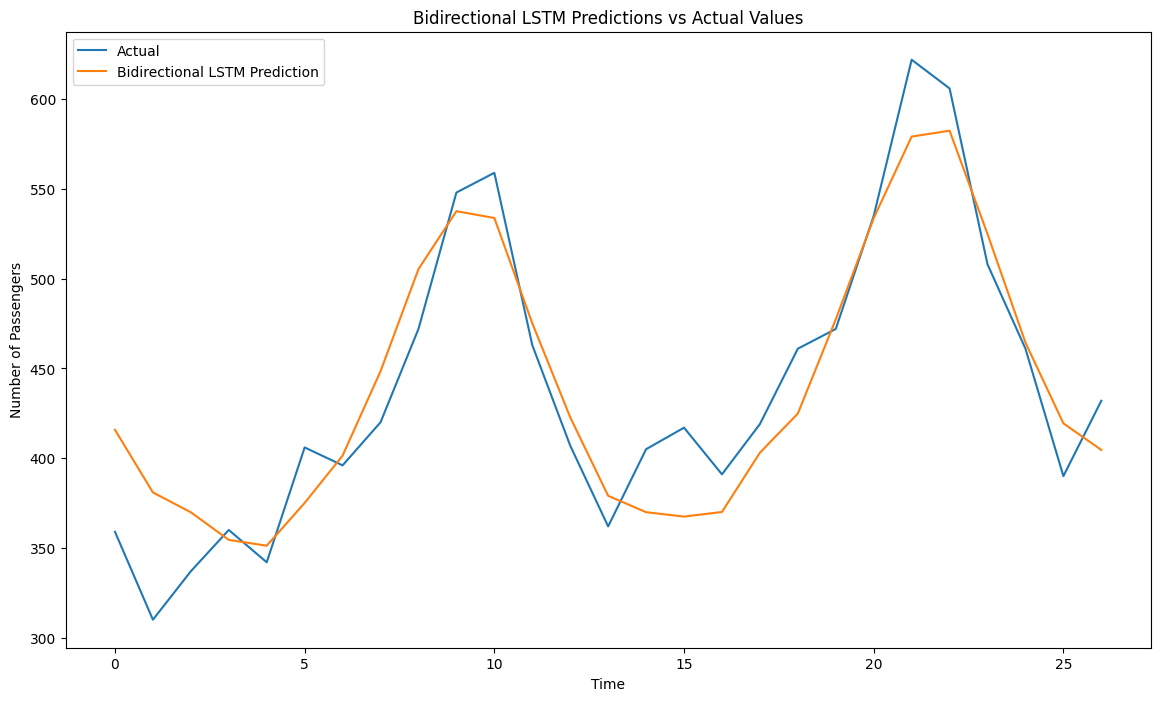

In [ ]:
for model_name, history in history_dict.items():
    model = create_model(model_name)
    model.fit(X_train, y_train, epochs=75, batch_size=32, validation_data=(X_test, y_test), verbose=0, callbacks=[early_stopping])

    # Predict and inverse transform predictions
    y_pred = model.predict(X_test)

    # Check if y_pred is 3D (has multiple time steps), otherwise use it directly if it's 2D
    if y_pred.ndim == 3:
        y_pred_last = y_pred[:, -1, :]  # Take the last time step for each sample
    else:
        y_pred_last = y_pred  # If it's already 2D, use it as is

    # Inverse transform the predictions (now 2D)
    y_pred_rescaled = scaler.inverse_transform(y_pred_last)

    # Inverse transform the actual values (y_test should also be 2D)
    y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Create a new figure for each model
    plt.figure(figsize=(14, 8))

    # Plot predictions vs actual values
    plt.plot(y_test_rescaled, label='Actual')
    plt.plot(y_pred_rescaled, label=f'{model_name} Prediction')

    # Add title and labels for each model
    plt.title(f'{model_name} Predictions vs Actual Values')
    plt.xlabel('Time')
    plt.ylabel('Number of Passengers')
    plt.legend()
    plt.show()
